In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../scripts/')
import warnings
warnings.filterwarnings('ignore')

from utils import Utils
from datacleaner import DataCleaner
from model import Model
from feature_engineering import FeatureEngineering
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor


In [2]:
utils = Utils()
cleaner = DataCleaner()

In [3]:
merged_df = utils.load_data_dvc('v1.1-merged','data/train_merged_latest.csv','/home/teddy/dev/learning/10 academy/working/pharma_sales_prediction')

In [4]:
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [5]:
merged_df['PromoInterval'].fillna('0', inplace=True)

In [6]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [7]:
merged_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

Remove values where the store was closed

In [8]:
sales_train = merged_df[merged_df['Open'] != 0 ]

In [9]:
sales_train.shape

(844392, 18)

Generate new features from the date column

In [10]:
feature_eng = FeatureEngineering(sales_train)

In [ ]:
feature_eng.preprocess()

In [ ]:
latest_df = feature_eng.df

In [ ]:
utils.save_csv(latest_df, '../data/feature_engineered_df.csv')

In [3]:
latest_df = utils.load_data_dvc('v2-merged','data/feature_engineered_df.csv','/home/teddy/dev/learning/10 academy/working/pharma_sales_prediction')

In [4]:
random_forest_args = {
    'n_estimators': 100,
    'max_depth': 16,
    'max_features': 'sqrt',
    'n_jobs': 4
}

In [5]:
modeling = Model(latest_df, RandomForestRegressor)

In [7]:
model, result = modeling.train(random_forest_args, 'random_forest_regressor')

Registered model 'RandomForestModel' already exists. Creating a new version of this model...
2022/05/28 16:03:58 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: RandomForestModel, version 5
Created version '5' of model 'RandomForestModel'.


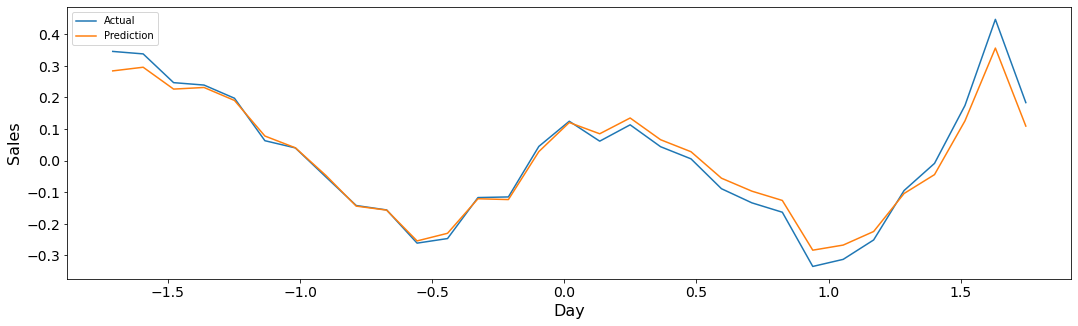

In [8]:
modeling.prediction_graph(result)

In [10]:
feat_imp = modeling.get_features_importance(model)

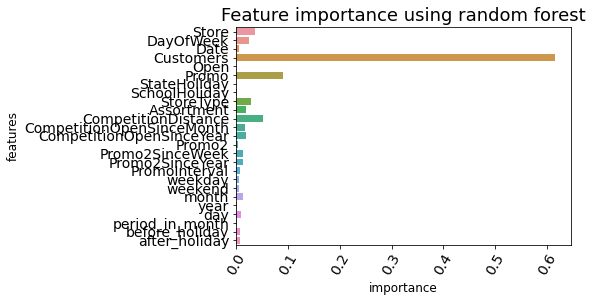

In [17]:
sns.barplot(data=feat_imp,  x="importance", y="features")
plt.title("Feature importance using random forest", size=18)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("importance", fontsize=12)
plt.ylabel("features", fontsize=12)
plt.show()


In [ ]:
def serialize_model(model):
    now = datetime.now()
    timestamp = now.strftime("%d-%m-%Y-%H-%M-%S")
    pickle.dump(model, open(f'../models/{timestamp}.pkl', 'wb'))

In [16]:
serialize_model(model)